In [5]:
# %pip install seaborn
%pip install plotly

^C
Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly as plot
import time


You should consider upgrading via the 'c:\Users\anand\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


Matplotlib is building the font cache; this may take a moment.


In [7]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [9]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\anand\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [10]:
file_path = 'train_dataframes.xlsx'
xls = pd.ExcelFile(file_path)

sheet_names = xls.sheet_names
sheet_names

['Week 15, Apr 2019',
 'Week 21, May 2019',
 'Week 24, Jun 2019',
 'Week 29, Jul 2019',
 'Week 33, Aug 2019',
 'Week 37, Sep 2019',
 'Week 41, Oct 2019',
 'Week 44, Nov 2019',
 'Week 51, Dec 2019',
 'Week 01, Jan 2020',
 'Week 06, Feb 2020',
 'Week 10, Mar 2020',
 'Week 20, May 2020',
 'Week 24, Jun 2020']

In [11]:
# Load data from the first sheet
week_data = pd.read_excel(file_path, sheet_name='Week 01, Jan 2020')
week_data.head()

,datetime,week_X-2,week_X-3,week_X-4,MA_X-4,dayOfWeek,weekend,holiday,Holiday_ID,hourOfDay,T2M_toc,DEMAND
0,2015-01-31 01:00:00,962.2865,906.9580,970.3450,938.004850,1,1,0,0,1,25.308496,954.2018
1,2015-01-31 02:00:00,933.3221,863.5135,912.1755,900.284075,1,1,0,0,2,25.141443,913.8660
2,2015-01-31 03:00:00,903.9817,848.4447,900.2688,881.704325,1,1,0,0,3,25.006738,903.3637
3,2015-01-31 04:00:00,900.9995,839.8821,889.9538,876.458825,1,1,0,0,4,24.899713,889.0806
4,2015-01-31 05:00:00,904.3481,847.1073,893.6865,879.190775,1,1,0,0,5,24.821558,910.1472


In [12]:
file_path = 'continuous dataset.csv'
Train_data = pd.read_csv(file_path)
Train_data_demand_extract = pd.read_csv(file_path ,index_col=[0],parse_dates=[0])

In [13]:
Train_data.head()

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
0,2015-01-03 01:00:00,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
1,2015-01-03 02:00:00,912.1755,25.899255,0.018653,0.016418,22.166944,23.399255,0.017265,0.001327,10.681517,22.578943,0.016509,0.087646,5.572471,0,0,0
2,2015-01-03 03:00:00,900.2688,25.937280,0.018768,0.015480,22.454911,23.343530,0.017211,0.001428,10.874924,22.531030,0.016479,0.078735,5.871184,0,0,0
3,2015-01-03 04:00:00,889.9538,25.957544,0.018890,0.016273,22.110481,23.238794,0.017128,0.002599,10.518620,22.512231,0.016487,0.068390,5.883621,0,0,0
4,2015-01-03 05:00:00,893.6865,25.973840,0.018981,0.017281,21.186089,23.075403,0.017059,0.001729,9.733589,22.481653,0.016456,0.064362,5.611724,0,0,0


In [14]:
Train_data.isna().sum()

datetime      0
nat_demand    0
T2M_toc       0
QV2M_toc      0
TQL_toc       0
W2M_toc       0
T2M_san       0
QV2M_san      0
TQL_san       0
W2M_san       0
T2M_dav       0
QV2M_dav      0
TQL_dav       0
W2M_dav       0
Holiday_ID    0
holiday       0
school        0
dtype: int64

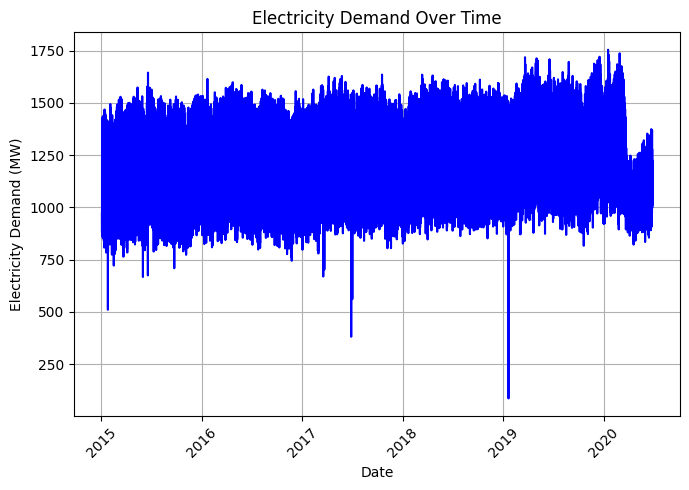

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert datetime column to datetime type
Train_data['datetime'] = pd.to_datetime(Train_data['datetime'])

# Create the plot using matplotlib
plt.figure(figsize=(7, 5))  # Set figure size
plt.plot(Train_data['datetime'], Train_data['nat_demand'], label="Electricity Demand (MW)", color='blue')

# Add titles and labels
plt.title("Electricity Demand Over Time")
plt.xlabel("Date")
plt.ylabel("Electricity Demand (MW)")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show grid
plt.grid(True)

# Show plot
plt.tight_layout()  # Adjust layout to prevent cut-off labels
plt.show()


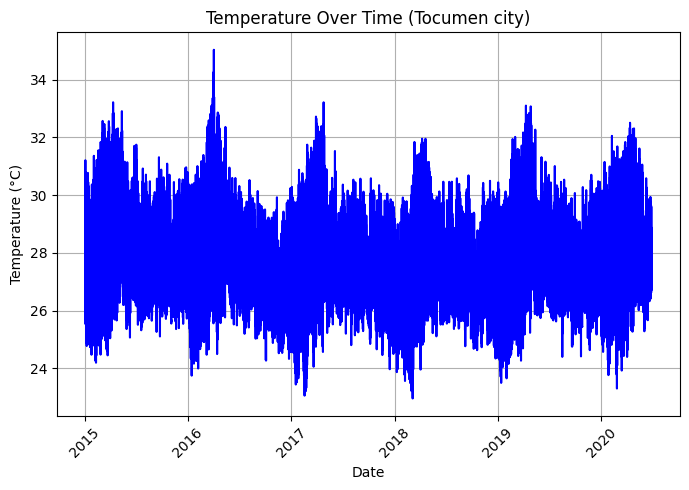

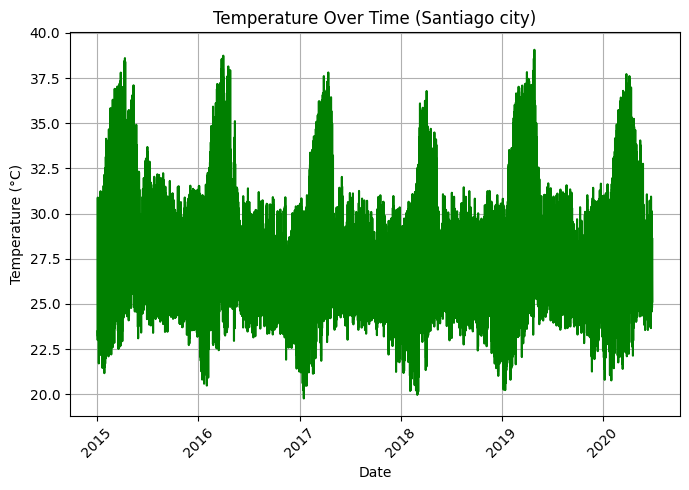

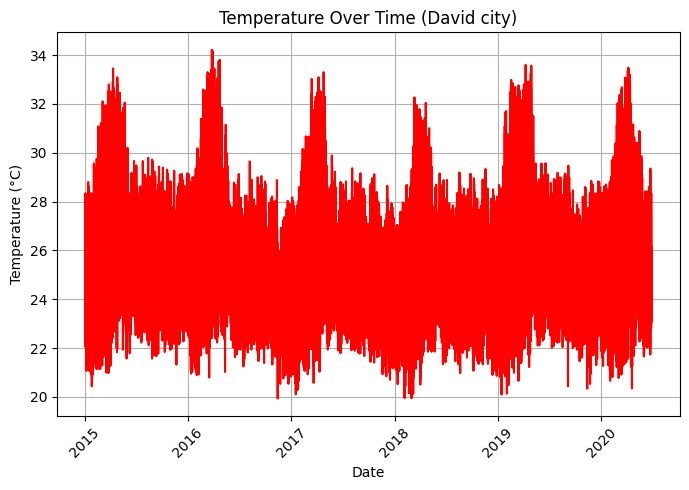

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert datetime column to datetime type
Train_data['datetime'] = pd.to_datetime(Train_data['datetime'])

# Define figure size globally for all plots
figsize = (7, 5)

# Plot for Tocumen city
plt.figure(figsize=figsize)
plt.plot(Train_data['datetime'], Train_data['T2M_toc'], label="Tocumen", color='blue')
plt.title("Temperature Over Time (Tocumen city)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot for Santiago city
plt.figure(figsize=figsize)
plt.plot(Train_data['datetime'], Train_data['T2M_san'], label="Santiago", color='green')
plt.title("Temperature Over Time (Santiago city)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot for David city
plt.figure(figsize=figsize)
plt.plot(Train_data['datetime'], Train_data['T2M_dav'], label="David", color='red')
plt.title("Temperature Over Time (David city)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
Train_data_demand_extract.T2M_toc = Train_data_demand_extract.T2M_toc.astype(int)
Train_data_demand_extract.T2M_san = Train_data_demand_extract.T2M_san.astype(int)
Train_data_demand_extract.T2M_dav = Train_data_demand_extract.T2M_dav.astype(int)

#Temperature over Electricty demand****

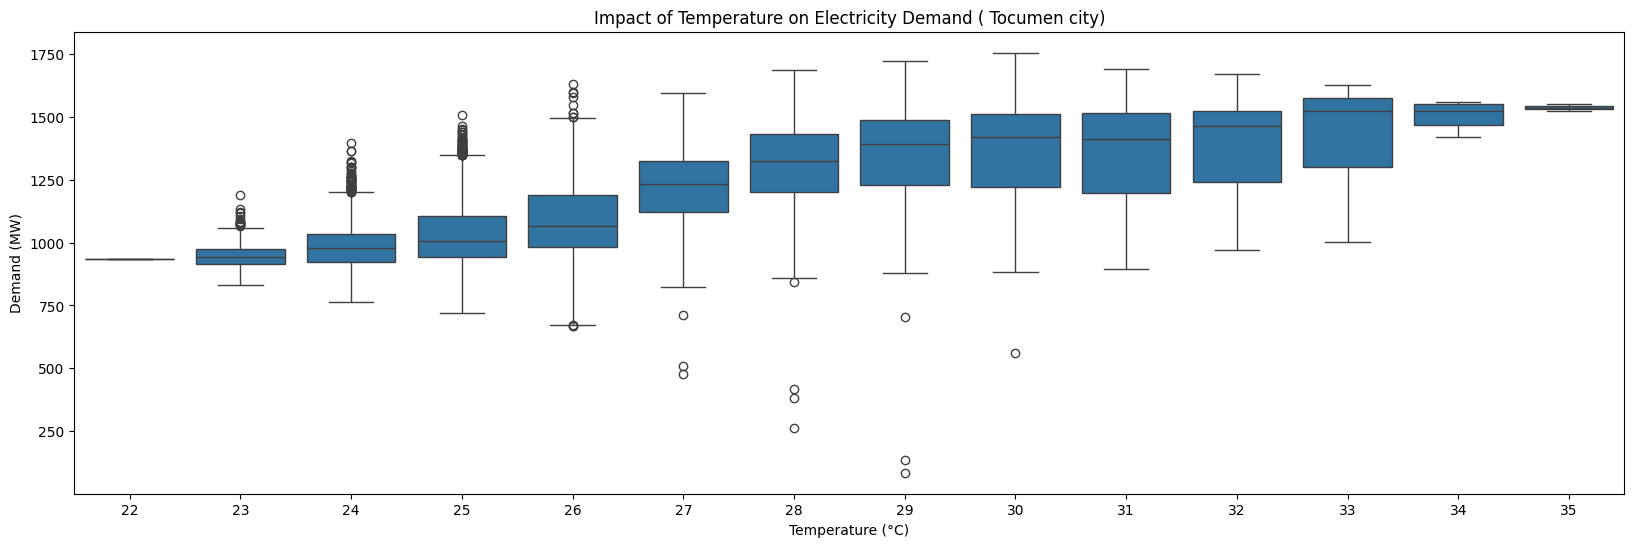

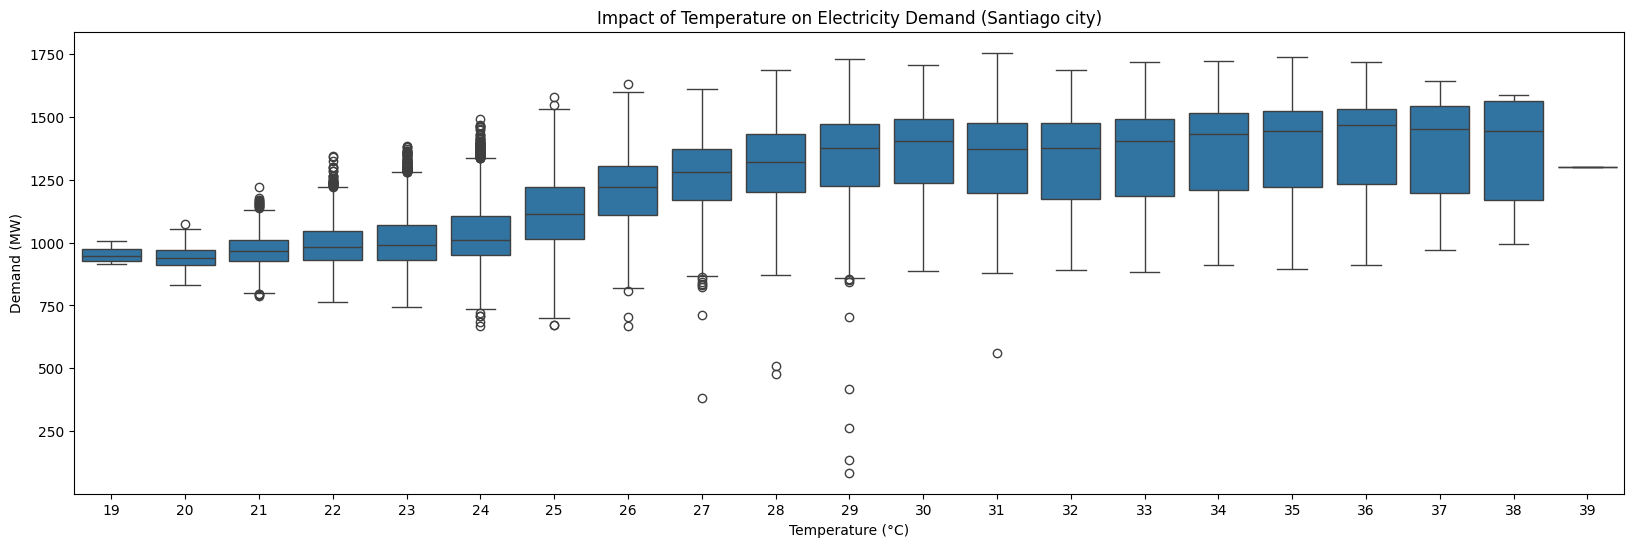

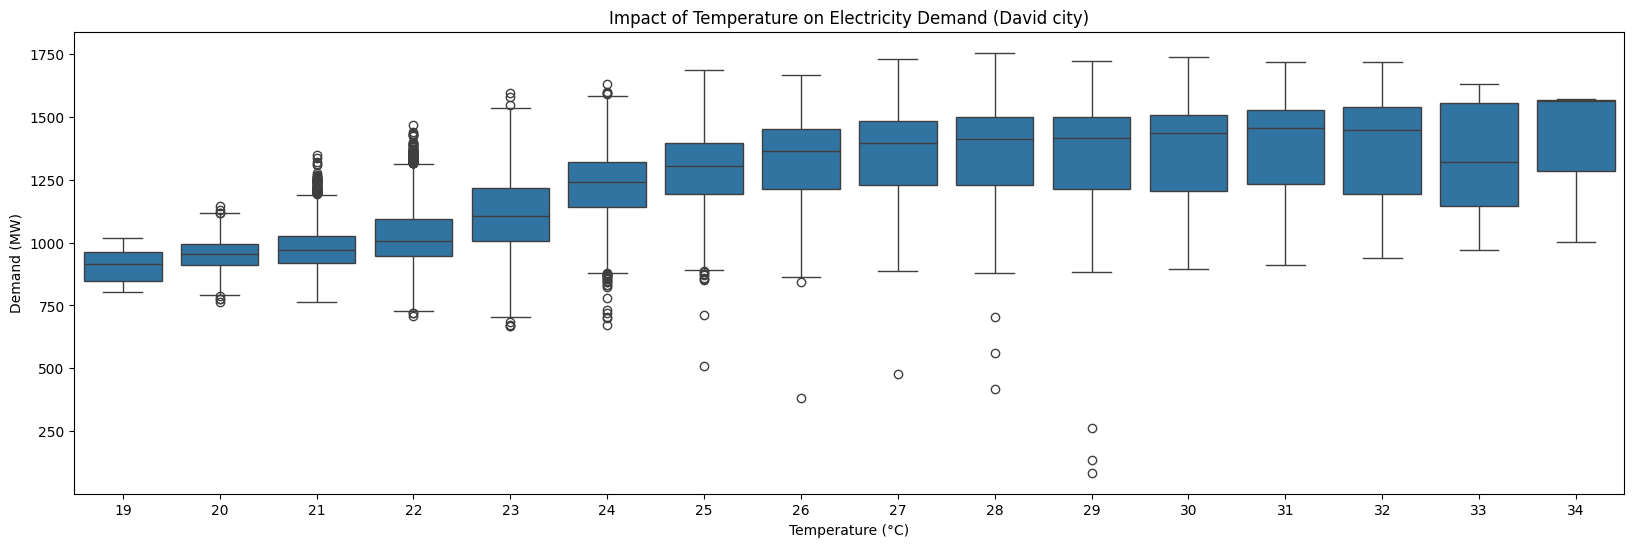

In [18]:
import matplotlib.pyplot as plt
# Impact of Temperature on Electricity Demand
plt.figure(figsize=(20, 6))
sns.boxplot(x='T2M_toc', y='nat_demand', data=Train_data_demand_extract)
plt.title('Impact of Temperature on Electricity Demand ( Tocumen city)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Demand (MW)')
plt.show()

# Impact of Temperature on Electricity Demand
plt.figure(figsize=(20, 6))
sns.boxplot(x='T2M_san', y='nat_demand', data=Train_data_demand_extract)
plt.title('Impact of Temperature on Electricity Demand (Santiago city)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Demand (MW)')
plt.show()

# Impact of Temperature on Electricity Demand
plt.figure(figsize=(20, 6))
sns.boxplot(x='T2M_dav', y='nat_demand', data=Train_data_demand_extract)
plt.title('Impact of Temperature on Electricity Demand (David city)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Demand (MW)')
plt.show()

# demand during holidays******

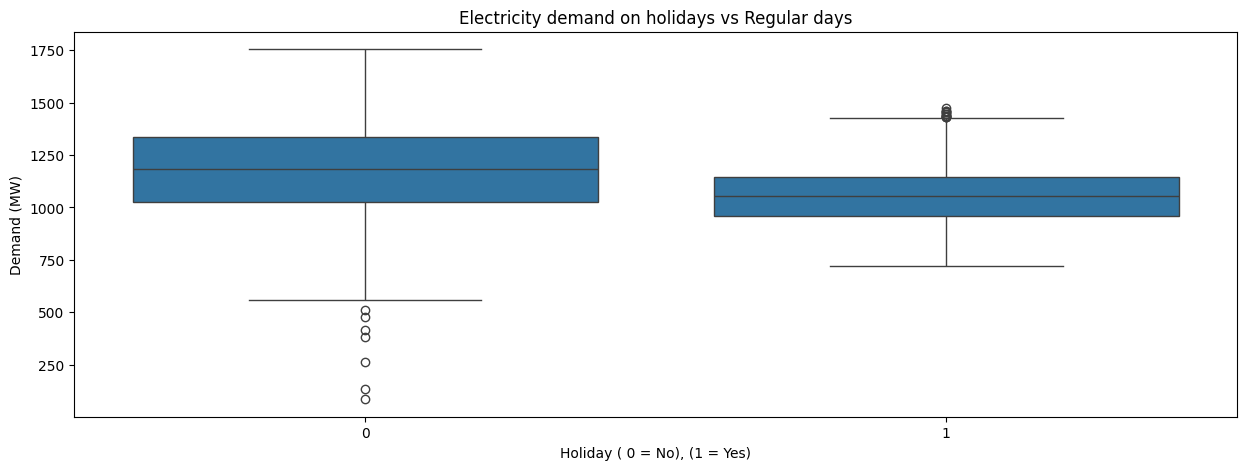

In [19]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='holiday', y='nat_demand', data=Train_data)
plt.title('Electricity demand on holidays vs Regular days')
plt.xlabel('Holiday ( 0 = No), (1 = Yes)')
plt.ylabel('Demand (MW)')
plt.show()

# demand during school days******

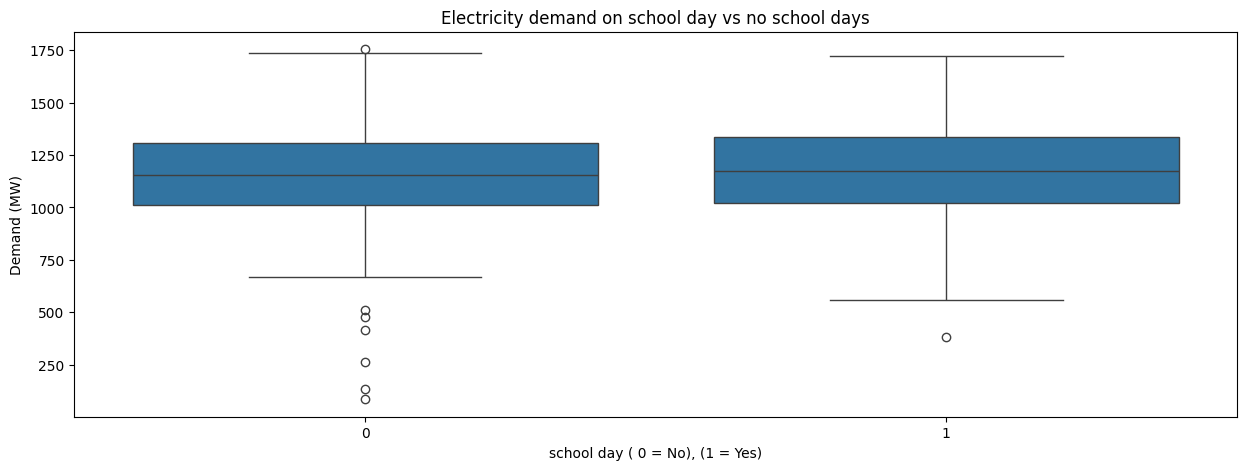

In [20]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='school', y='nat_demand', data=Train_data)
plt.title('Electricity demand on school day vs no school days')
plt.xlabel('school day ( 0 = No), (1 = Yes)')
plt.ylabel('Demand (MW)')
plt.show()


# Line plot of average load by hour of the day******

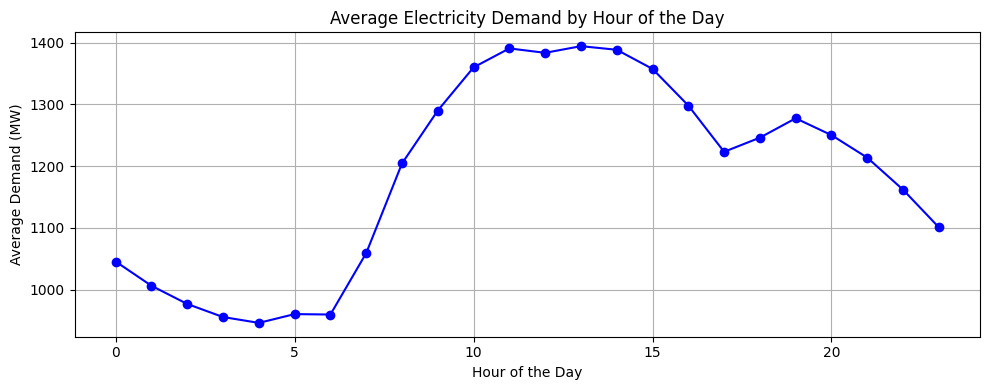

In [30]:
import matplotlib.pyplot as plt

# Group the data by 'hourOfDay' and calculate the mean
avg_demand_by_hour = week_data.groupby('hourOfDay')['DEMAND'].mean().reset_index()

# Create the plot using matplotlib
plt.figure(figsize=(10, 4))  # Set figure size
plt.plot(avg_demand_by_hour['hourOfDay'], avg_demand_by_hour['DEMAND'], color='blue', marker='o')

# Add title and labels
plt.title('Average Electricity Demand by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Demand (MW)')

# Show grid
plt.grid(True)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent cut-off labels
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, GRU, Dense, Dropout, concatenate
from tensorflow.keras.metrics import RootMeanSquaredError
import matplotlib.pyplot as plt

In [ ]:
start_time = time.time()  # Record start time

# Select the features and label
features = data_resampled[['QV2M_toc', 'TQL_toc', 'W2M_toc', 'QV2M_san', 'TQL_san', 'W2M_san', 'QV2M_dav', 'TQL_dav', 'W2M_dav','T2M_toc', 'T2M_san', 'T2M_dav', 'datetime']]
labels = data_resampled['nat_demand']

# Convert datetime to numerical values (e.g., timestamp)
features['datetime'] = pd.to_datetime(features['datetime']).astype(int) / 10**9

# Handle missing values
features = features.fillna(method='ffill')

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Prepare data for GRU model (3D shape: samples, timesteps, features)
# Assuming we are treating each row as a separate sample with 1 timestep
X = features_scaled.reshape(features_scaled.shape[0], 1, features_scaled.shape[1])
y = labels.values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build the GRU model
model = Sequential([
    GRU(64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[RootMeanSquaredError()])

# Train the model
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), batch_size=1440)

# Evaluate the model
loss, rmse = model.evaluate(X_test, y_test)
print(f'Test Loss (MSE): {loss}')
print(f'Test RMSE: {rmse}')

end_time = time.time()  # Record end time

elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.4f} seconds")


In [110]:
import joblib
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


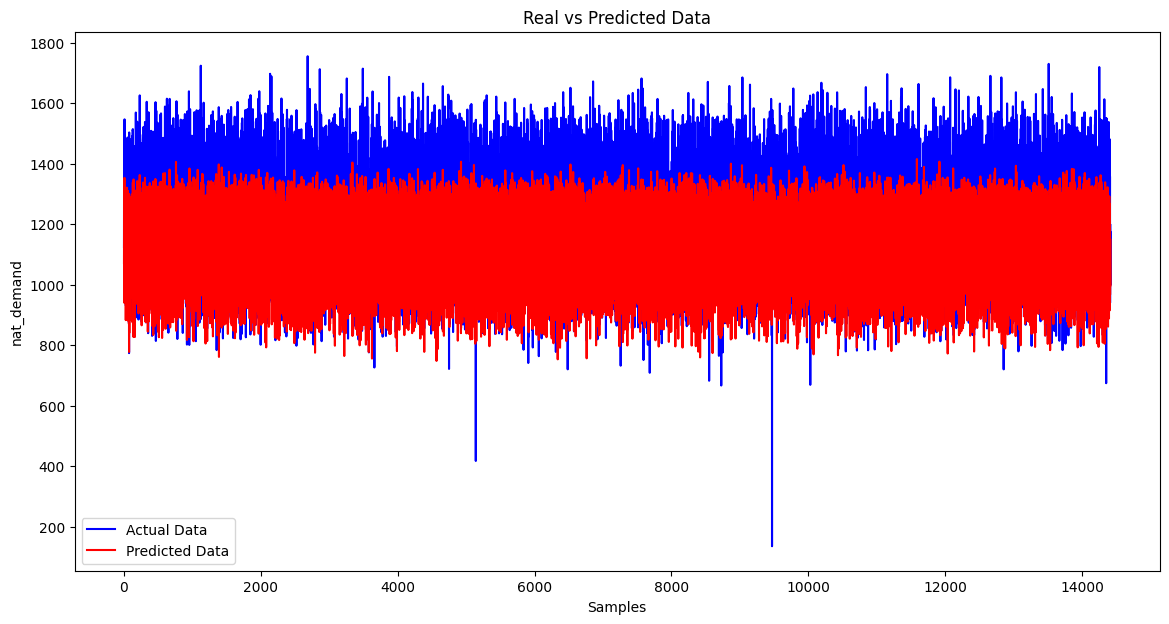

In [89]:
predictions = model.predict([X_test])
plt.figure(figsize=(14, 7))
plt.plot(y_test, color='blue', label='Actual Data')
plt.plot(predictions, color='red', label='Predicted Data')
plt.title('Real vs Predicted Data')
plt.xlabel('Samples')
plt.ylabel('nat_demand')
plt.legend()
plt.show()

In [109]:
model.save('GRU_Model.h5')

In [108]:
import numpy as np
import pandas as pd
from datetime import datetime

# Example new data (single row with the same feature columns)
new_data = {
    'QV2M_toc': [0.018576382],
    'TQL_toc': [0.016174316],
    'W2M_toc': [21.85054581787518],
    'QV2M_san': [0.017271755],
    'TQL_san': [0.0018553734],
    'W2M_san': [10.328948729384228],
    'QV2M_dav': [0.016562222],
    'TQL_dav': [0.09609985],
    'W2M_dav': [5.364147952093894],
    'T2M_toc': [25.865258789062523],
    'T2M_san': [23.482446289062523],
    'T2M_dav': [22.662133789062523],
    'datetime': ['2015-01-03 01:00:00']  # New datetime
}

# Convert to DataFrame
new_data_df = pd.DataFrame(new_data)

# Convert datetime to timestamp
new_data_df['datetime'] = pd.to_datetime(new_data_df['datetime']).astype(int) / 10**9

# Handle missing values if necessary (forward fill)
new_data_df = new_data_df.fillna(method='ffill')
new_scaler = StandardScaler()
# Scale the features (use the same scaler as used during training)
new_data_scaled = scaler.transform(new_data_df)

# Reshape the data to match the model's input shape (1, 1, 13)
new_data_scaled = new_data_scaled.reshape(1, 1, new_data_scaled.shape[1])

# Make a prediction
prediction = model.predict(new_data_scaled)

# Output the prediction
print(f'Predicted value: {prediction[0][0]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted value: 881.2236328125


/tmp/ipykernel_36/2692512720.py:29: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [123]:
import numpy as np
import pandas as pd
from datetime import datetime
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler
import joblib

# Load the trained model
model = load_model('/kaggle/working/GRU_Model.h5')

# Load the same scaler used during training (this assumes you saved the scaler)
scaler = joblib.load('/kaggle/working/scaler.pkl')

# Prediction function
def make_prediction(input_data):
    # Convert the input data to a DataFrame
    input_df = pd.DataFrame(input_data)
    
    # Convert 'datetime' to timestamp
    input_df['datetime'] = pd.to_datetime(input_df['datetime']).astype(int) / 10**9
    
    # Handle missing values (forward fill)
    input_df = input_df.fillna(method='ffill')
    
    # Scale the input features
    input_scaled = scaler.transform(input_df)
    
    # Reshape the input to match the model's expected input shape (samples, timesteps, features)
    input_scaled = input_scaled.reshape(1, 1, input_scaled.shape[1])
    
    # Make prediction
    prediction = model.predict(input_scaled)
    
    return prediction[0][0]

# Updated example input data
new_data = {
    'QV2M_toc': [0.018576382],
    'TQL_toc': [0.016174316],
    'W2M_toc': [21.85054581787518],
    'QV2M_san': [0.017271755],
    'TQL_san': [0.0018553734],
    'W2M_san': [10.328948729384228],
    'QV2M_dav': [0.016562222],
    'TQL_dav': [0.09609985],
    'W2M_dav': [5.364147952093894],
    'T2M_toc': [25.865258789062523],
    'T2M_san': [23.482446289062523],
    'T2M_dav': [22.662133789062523],
    'datetime': ['2015-01-03 01:00:00']  
}

# Make a prediction
predicted_value = make_prediction(new_data)
print(f'Predicted value: {predicted_value}')


/tmp/ipykernel_36/2838991175.py:23: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
Predicted value: 881.2236328125


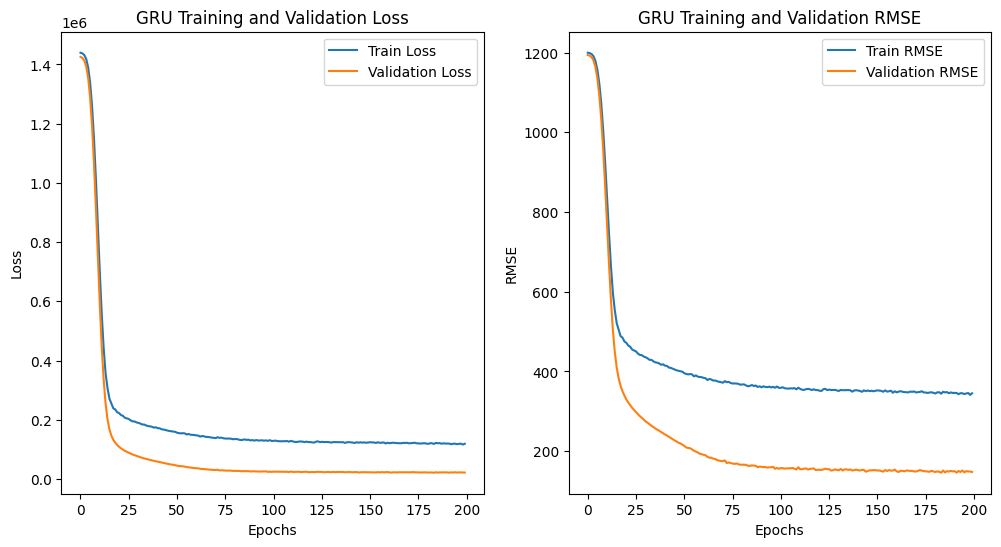

In [28]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('GRU Training and Validation Loss')
plt.legend()

# Plot training and validation RMSE
plt.subplot(1, 2, 2)
plt.plot(history.history['root_mean_squared_error'], label='Train RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.title('GRU Training and Validation RMSE')
plt.legend()

plt.show()

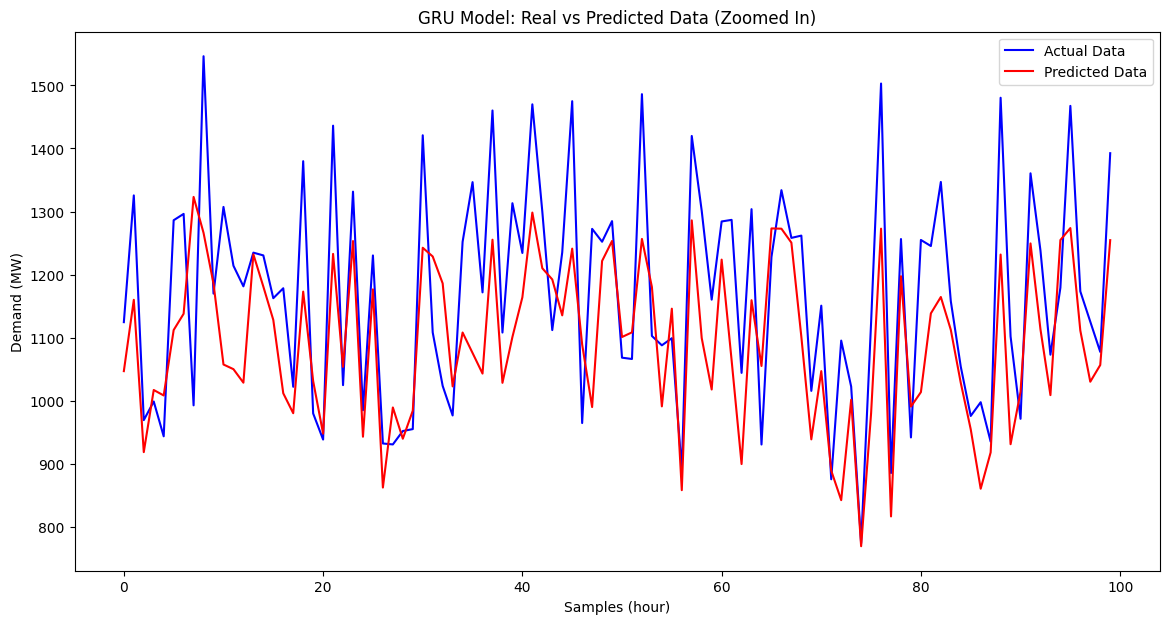

In [29]:
start_sample = 0
end_sample = 100

# Slice the test data and predictions
y_test_zoomed = y_test[start_sample:end_sample]
predictions_zoomed = predictions[start_sample:end_sample]

# Plot the zoomed-in data
plt.figure(figsize=(14, 7))
plt.plot(y_test_zoomed, color='blue', label='Actual Data')
plt.plot(predictions_zoomed, color='red', label='Predicted Data')
plt.title('GRU Model: Real vs Predicted Data (Zoomed In)')
plt.xlabel('Samples (hour)')
plt.ylabel('Demand (MW)')
plt.legend()
plt.show()

In [30]:
!pip install lazypredict

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning:

os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



In [31]:
!pip install xgboost


In [32]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming your features and target variables are prepared
X = Train_data.drop(columns=['nat_demand'])  # Replace with your actual target column
y = Train_data['nat_demand']  # Replace with your actual target column

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                             max_depth = 5, alpha = 10, n_estimators = 100)

xgb_model.fit(X_train, y_train)


XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

#  #Prediction by xgboost******

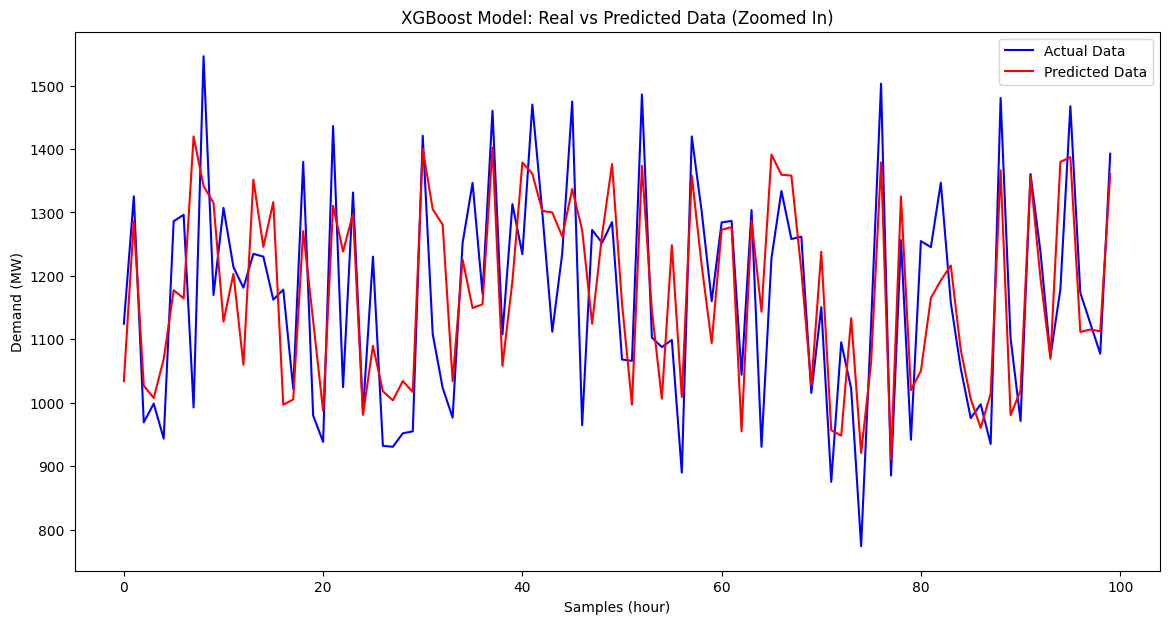

In [34]:
import matplotlib.pyplot as plt

# Generate predictions using the trained XGBoost model
xgb_predictions = xgb_model.predict(X_test)

# Define the sample range you want to zoom in on
start_sample = 0
end_sample = 100

# Slice the test data and predictions
y_test_zoomed = y_test.iloc[start_sample:end_sample]
xgb_predictions_zoomed = xgb_predictions[start_sample:end_sample]

# Plot the zoomed-in data
plt.figure(figsize=(14, 7))
plt.plot(y_test_zoomed.values, color='blue', label='Actual Data')
plt.plot(xgb_predictions_zoomed, color='red', label='Predicted Data')
plt.title('XGBoost Model: Real vs Predicted Data (Zoomed In)')
plt.xlabel('Samples (hour)')
plt.ylabel('Demand (MW)')
plt.legend()
plt.show()

